# Hate speech report for GPT Single prompt for the Hate and Fine-grained

In this example, I used the mentioned prompt, Where I wanted to prodice both labels in the single Go.

https://chatgpt.com/share/d9fb9101-35eb-4bff-86c1-e37690993466


# Load the original labels and the GPT-produced labels from CSV files


In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
original_labels_path = 'Datasets/test.csv'  # Update with the correct path
gpt_labels_path = 'results_LLM/GPT_classified_texts_one_hot.csv'  # Update with the correct path

original_labels = pd.read_csv(original_labels_path)
gpt_labels = pd.read_csv(gpt_labels_path)



# # Basic EDA for original labels

# Basic EDA for GPT labels

In [2]:
# Distribution of binary classification in original labels
print("\nDistribution of Hate Speech in Original Labels:")
print(original_labels['class'].value_counts())

# Distribution of binary classification in GPT labels
print("\nDistribution of Hate Speech in GPT Labels:")
print(gpt_labels['class'].value_counts())

# Distribution of fine-grained categories in original labels
print("\nDistribution of Fine-Grained Categories in Original Labels:")
fine_grained_columns = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']
for column in fine_grained_columns:
    print(f"\n{column} Distribution in Original Labels:")
    print(original_labels[column].value_counts())
    print(f"\n{column} Distribution in GPT Labels:")
    print(gpt_labels[column].value_counts())


Distribution of Hate Speech in Original Labels:
class
0    45291
1    10254
Name: count, dtype: int64

Distribution of Hate Speech in GPT Labels:
class
0    47678
1     7867
Name: count, dtype: int64

Distribution of Fine-Grained Categories in Original Labels:

Disability Distribution in Original Labels:
Disability
0    55510
1       35
Name: count, dtype: int64

Disability Distribution in GPT Labels:
Disability
0    55468
1       77
Name: count, dtype: int64

Gender/Sexual Distribution in Original Labels:
Gender/Sexual
0    52065
1     3480
Name: count, dtype: int64

Gender/Sexual Distribution in GPT Labels:
Gender/Sexual
0    52037
1     3508
Name: count, dtype: int64

Origin/Nationality Distribution in Original Labels:
Origin/Nationality
0    55417
1      128
Name: count, dtype: int64

Origin/Nationality Distribution in GPT Labels:
Origin/Nationality
0    55497
1       48
Name: count, dtype: int64

Race/Ethnicity Distribution in Original Labels:
Race/Ethnicity
0    52199
1     3346

In [3]:
original_labels.head(3)

,english_text,urdu_text,class,Disability,Gender/Sexual,Origin/Nationality,Race/Ethnicity,Religion
0,"@ithastostop2 @Tearceun1 @JustinTrudeau Wait, ...",ای بی سی پی پی پی او کے بارے میں کیا وہ ایک دم...,1,0,0,0,1,0
1,@user motherfucker you have 2k tweets in one m...,@Os's آپ کے پاس ایک ماہ میں 2 ٹویٹ کیا ہے. آپ ...,0,0,0,0,0,0
2,@Xboxlove1332584 @JAAY_ROCK_ Lies yet bots had...,@ شوہروں کے لیے یہ بات ہے کہ 6 سال قبل قبل حضر...,0,0,0,0,0,0


In [4]:
gpt_labels.head(3)

,english_text,class,Disability,Gender/Sexual,Origin/Nationality,Race/Ethnicity,Religion
0,"@ithastostop2 @Tearceun1 @JustinTrudeau Wait, ...",0,0,0,0,0,0
1,@user motherfucker you have 2k tweets in one m...,0,0,0,0,0,0
2,@Xboxlove1332584 @JAAY_ROCK_ Lies yet bots had...,0,0,0,0,0,0


# Binary classification Report

In [5]:
# Extract the binary classification labels (hate speech or not)
original_binary = original_labels['class'].astype(int)
gpt_binary = gpt_labels['class'].astype(int)

# Compute binary classification metrics
binary_classification_report = classification_report(original_binary, gpt_binary)
binary_confusion_matrix = confusion_matrix(original_binary, gpt_binary)
binary_f1_score = f1_score(original_binary, gpt_binary)

print("Binary Classification Report:")
print(binary_classification_report)
print("Binary Confusion Matrix:")
print(binary_confusion_matrix)
print("Binary F1 Score:")
print(binary_f1_score)



Binary Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     45291
           1       0.99      0.76      0.86     10254

    accuracy                           0.95     55545
   macro avg       0.97      0.88      0.91     55545
weighted avg       0.95      0.95      0.95     55545

Binary Confusion Matrix:
[[45186   105]
 [ 2492  7762]]
Binary F1 Score:
0.8566856133767452


## Save results in CSV

In [6]:
binary_report_df = pd.DataFrame.from_dict(classification_report(original_binary, gpt_binary, output_dict=True)).transpose()
binary_report_df.to_csv('results_LLM/Reports/GPT4_multi-task_binary_classification_report.csv')

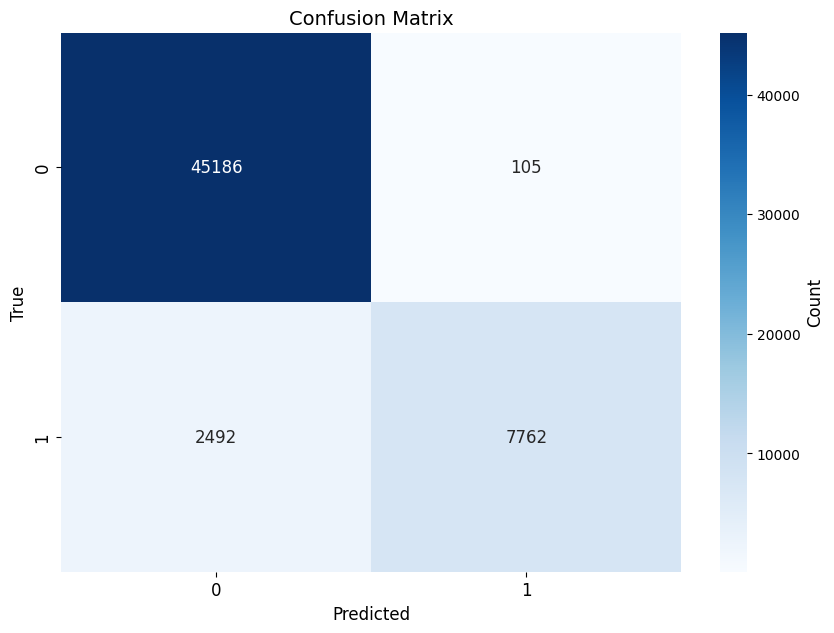

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     45291
           1       0.99      0.76      0.86     10254

    accuracy                           0.95     55545
   macro avg       0.97      0.88      0.91     55545
weighted avg       0.95      0.95      0.95     55545



In [7]:
# Assuming the column with the labels is named 'class'
y_true = original_labels['class']
y_pred = gpt_labels['class']

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 12},  # Increase font size for annotations
                 xticklabels=list(set(y_true)), yticklabels=list(set(y_true)))
plt.xlabel('Predicted', fontsize=12)  # Increase font size for x-axis label
plt.ylabel('True', fontsize=12)       # Increase font size for y-axis label
plt.title('Confusion Matrix', fontsize=14)  # Increase font size for title
ax.tick_params(axis='x', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', labelsize=12)  # Increase font size for y-axis ticks
ax.figure.axes[-1].set_ylabel('Count', fontsize=12)  # Increase font size for colorbar label
plt.savefig('results_LLM/Reports/GPT4_multi-task_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()

# Generate the classification report
report = classification_report(y_true, y_pred)

# Print and save the classification report
print("Classification Report:")
print(report)



# Fine-Grained Classification Report

In [8]:
# Filter the instances where GPT produced a 1 for hate speech
gpt_hate_speech = gpt_labels[gpt_labels['class'] == 1]
print(len(gpt_hate_speech))

# Extract the corresponding original labels for these instances
original_hate_speech = original_labels.loc[gpt_hate_speech.index]


7867


In [9]:

# Combine fine-grained categories into a single multi-class label for hate speech only
def combine_labels(row):
    if row['Disability'] == 1:
        return 'Disability'
    elif row['Gender/Sexual'] == 1:
        return 'Gender/Sexual'
    elif row['Origin/Nationality'] == 1:
        return 'Origin/Nationality'
    elif row['Race/Ethnicity'] == 1:
        return 'Race/Ethnicity'
    elif row['Religion'] == 1:
        return 'Religion'
    else:
        return 'None'  # Exclude non-hate speech

# Apply the function to create a combined label
original_hate_speech['Combined_Label'] = original_hate_speech.apply(combine_labels, axis=1)
gpt_hate_speech['Combined_Label'] = gpt_hate_speech.apply(combine_labels, axis=1)

# # Filter out non-hate speech rows in the combined labels
# original_hate_speech = original_hate_speech.dropna(subset=['Combined_Label'])
# gpt_hate_speech = gpt_hate_speech.loc[original_hate_speech.index]



C:\Users\Nimra\AppData\Local\Temp\ipykernel_2740\2434666302.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_hate_speech['Combined_Label'] = gpt_hate_speech.apply(combine_labels, axis=1)


In [10]:
print(len(original_hate_speech))
print(len(gpt_hate_speech))
gpt_hate_speech.head(3)

7867
7867


,english_text,class,Disability,Gender/Sexual,Origin/Nationality,Race/Ethnicity,Religion,Combined_Label
4,@ZetaHal0 @KrazyRabb1t your a bitch so your op...,1,0,1,0,0,0,Gender/Sexual
7,@Scarfac50124049 @gurukulguy @MeghUpdates So u...,1,0,0,0,0,1,Religion
8,@avalynheartz Just got a new one bitch,1,0,1,0,0,0,Gender/Sexual


c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Multi-Class Classification Report (Filtered Hate Speech):
                    precision    recall  f1-score   support

        Disability       0.38      1.00      0.55        29
     Gender/Sexual       0.85      1.00      0.92      2999
              None       0.00      0.00      0.00       111
Origin/Nationality       0.15      0.26      0.19        27
    Race/Ethnicity       0.99      0.81      0.89      2517
          Religion       0.98      0.98      0.98      2184

          accuracy                           0.92      7867
         macro avg       0.56      0.67      0.59      7867
      weighted avg       0.92      0.92      0.91      7867



c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


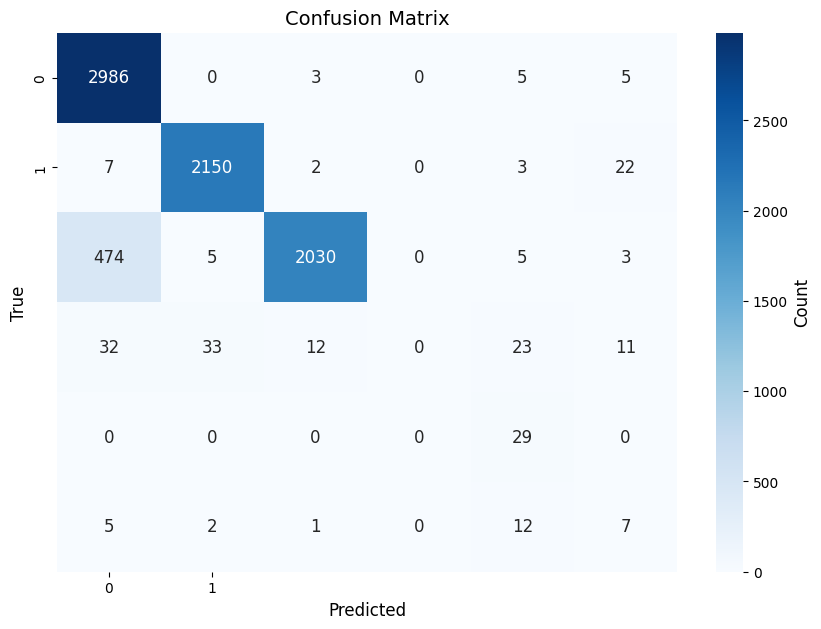

In [11]:
# Generate the multi-class classification report
print("\nMulti-Class Classification Report (Filtered Hate Speech):")
print(classification_report(original_hate_speech['Combined_Label'], gpt_hate_speech['Combined_Label']))

# Generate confusion matrix
cm = confusion_matrix(original_hate_speech['Combined_Label'], gpt_hate_speech['Combined_Label'], labels=original_hate_speech['Combined_Label'].unique().tolist())

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 12},  # Increase font size for annotations
                 xticklabels=list(set(y_true)), yticklabels=list(set(y_true)))
plt.xlabel('Predicted', fontsize=12)  # Increase font size for x-axis label
plt.ylabel('True', fontsize=12)       # Increase font size for y-axis label
plt.title('Confusion Matrix', fontsize=14)  # Increase font size for title
ax.tick_params(axis='x', labelsize=10)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', labelsize=10)  # Increase font size for y-axis ticks
ax.figure.axes[-1].set_ylabel('Count', fontsize=12)  # Increase font size for colorbar label
plt.savefig('results_LLM/Reports/GPT4_multi-task_Fine-grained_hate_speech_confusion_matrix.png')  # Save the confusion matrix as a PNG file
plt.show()


In [12]:
# Save the combined labels and the classification report to a CSV file
combined_labels_df = pd.DataFrame({
    'Original_Label': original_hate_speech['Combined_Label'],
    'GPT_Label': gpt_hate_speech['Combined_Label']
})

combined_labels_df.to_csv('results_LLM/Reports/combined_labels_filtered_hate_speech.csv', index=False)



# Compute and save the classification report to a CSV file


In [13]:
report = classification_report(original_hate_speech['Combined_Label'], gpt_hate_speech['Combined_Label'], output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('results_LLM/Reports/GPT4_multi-task_classification_report_filtered_hate_speech.csv')


c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif